In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import os
import pickle

## Dataset Partitioning Script

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("Cornell-University/arxiv")

print("Path to dataset files:", path)

100%|██████████| 1.54G/1.54G [06:46<00:00, 4.05MB/s]

Extracting files...


Path to dataset files: C:\Users\yangg\.cache\kagglehub\datasets\Cornell-University\arxiv\versions\262


In [3]:
import pandas as pd
import json
original_dataset = path + "/arxiv-metadata-oai-snapshot.json"
with open(original_dataset, "r") as f:
  for i in range(3):
    line = f.readline()
    data = json.loads(line)
    print(data)

{'id': '0704.0001', 'submitter': 'Pavel Nadolsky', 'authors': "C. Bal\\'azs, E. L. Berger, P. M. Nadolsky, C.-P. Yuan", 'title': 'Calculation of prompt diphoton production cross sections at Tevatron and\n  LHC energies', 'comments': '37 pages, 15 figures; published version', 'journal-ref': 'Phys.Rev.D76:013009,2007', 'doi': '10.1103/PhysRevD.76.013009', 'report-no': 'ANL-HEP-PR-07-12', 'categories': 'hep-ph', 'license': None, 'abstract': '  A fully differential calculation in perturbative quantum chromodynamics is\npresented for the production of massive photon pairs at hadron colliders. All\nnext-to-leading order perturbative contributions from quark-antiquark,\ngluon-(anti)quark, and gluon-gluon subprocesses are included, as well as\nall-orders resummation of initial-state gluon radiation valid at\nnext-to-next-to-leading logarithmic accuracy. The region of phase space is\nspecified in which the calculation is most reliable. Good agreement is\ndemonstrated with data from the Fermilab

In [4]:
import json

subset = "arxiv_csAI_subset.json"
target_category = "cs.AI"

total_lines = 0
kept_lines = 0

with open(original_dataset, "r") as infile, open(subset, "w") as outfile:
  for line in infile:
    total_lines += 1
    data = json.loads(line)
    cats = data.get('categories', '')
    cats_list = cats.split() if isinstance(cats, str) else []
    if target_category in cats_list:
      # write new jason
      json.dump(data, outfile)
      outfile.write("\n")
      kept_lines += 1

print("finished")


finished


In [5]:
with open(subset, "r") as f:
  for i in range(3):
    line = f.readline()
    data = json.loads(line)
    print(data)

{'id': '0704.0047', 'submitter': 'Igor Grabec', 'authors': 'T. Kosel and I. Grabec', 'title': 'Intelligent location of simultaneously active acoustic emission sources:\n  Part I', 'comments': '5 pages, 5 eps figures, uses IEEEtran.cls', 'journal-ref': None, 'doi': None, 'report-no': None, 'categories': 'cs.NE cs.AI', 'license': None, 'abstract': '  The intelligent acoustic emission locator is described in Part I, while Part\nII discusses blind source separation, time delay estimation and location of two\nsimultaneously active continuous acoustic emission sources.\n  The location of acoustic emission on complicated aircraft frame structures is\na difficult problem of non-destructive testing. This article describes an\nintelligent acoustic emission source locator. The intelligent locator comprises\na sensor antenna and a general regression neural network, which solves the\nlocation problem based on learning from examples. Locator performance was\ntested on different test specimens. Tests

In [6]:
file = path + "/arxiv-metadata-oai-snapshot.json"

def get_data():
  with open(file) as f:
    for line in f:
      yield line

In [7]:
data = get_data()

cols = ['id', 'authors', 'title', 'update_date', 'categories', 'abstract', 'doi']

interested_data = []
for line in data:
  paper = json.loads(line)
  interested_data.append({col: paper.get(col) for col in cols})

full_df = pd.DataFrame(interested_data)

In [8]:
key_word = "rag and rau"
full_df[full_df['title'].str.contains(key_word, case=False)]

,id,authors,title,update_date,categories,abstract,doi
2056995,2404.19543,"Yucheng Hu, Yuxing Lu",RAG and RAU: A Survey on Retrieval-Augmented L...,2025-07-01,cs.CL cs.AI,Large Language Models (LLMs) have catalyzed si...,None


## Load Data

In [9]:
subset = "arxiv_csAI_subset.json"
file = subset

def get_data():
  with open(file) as f:
    for line in f:
      yield line

## Clean and Format Data

In [10]:
data = get_data()

cols = ['id', 'authors', 'title', 'update_date', 'categories', 'abstract', 'doi']

interested_data = []
for line in data:
  paper = json.loads(line)
  interested_data.append({col: paper.get(col) for col in cols})

df = pd.DataFrame(interested_data)
df.head(5)

,id,authors,title,update_date,categories,abstract,doi
0,0704.0047,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,2009-09-29,cs.NE cs.AI,The intelligent acoustic emission locator is...,None
1,0704.0050,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,2007-05-23,cs.NE cs.AI,Part I describes an intelligent acoustic emi...,None
2,0704.0304,Carlos Gershenson,The World as Evolving Information,2013-04-05,cs.IT cs.AI math.IT q-bio.PE,This paper discusses the benefits of describ...,10.1007/978-3-642-18003-3_10
3,0704.0985,"Mohd Abubakr, R.M.Vinay",Architecture for Pseudo Acausal Evolvable Embe...,2007-05-23,cs.NE cs.AI,Advances in semiconductor technology are con...,None
4,0704.1028,Jianlin Cheng,A neural network approach to ordinal regression,2007-05-23,cs.LG cs.AI cs.NE,Ordinal regression is an important type of l...,None


How many data points have direct access to the paper via doi (url)?

In [11]:
total_rows = df.shape[0]
rows_with_links = df['doi'].notna().sum()

print(f"Percent Rows with Links = {rows_with_links / total_rows:.2f}%")

Percent Rows with Links = 0.11%


In [12]:
df = df.drop('doi', axis=1)

In [13]:
df.shape

(152693, 6)

In [14]:
df.dtypes

id             object
authors        object
title          object
update_date    object
categories     object
abstract       object
dtype: object

In [15]:
df.head(5)

,id,authors,title,update_date,categories,abstract
0,0704.0047,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,2009-09-29,cs.NE cs.AI,The intelligent acoustic emission locator is...
1,0704.0050,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,2007-05-23,cs.NE cs.AI,Part I describes an intelligent acoustic emi...
2,0704.0304,Carlos Gershenson,The World as Evolving Information,2013-04-05,cs.IT cs.AI math.IT q-bio.PE,This paper discusses the benefits of describ...
3,0704.0985,"Mohd Abubakr, R.M.Vinay",Architecture for Pseudo Acausal Evolvable Embe...,2007-05-23,cs.NE cs.AI,Advances in semiconductor technology are con...
4,0704.1028,Jianlin Cheng,A neural network approach to ordinal regression,2007-05-23,cs.LG cs.AI cs.NE,Ordinal regression is an important type of l...


In [16]:
df = df.dropna()

In [17]:
df.shape

(152693, 6)

# Basic Search Engine

### Most Basic Search
Prints 5 results that have the search word in the title.

In [18]:
key_word = 'rag and rau'

results = df[df['title'].str.contains(key_word, case=False)].head(5)

print(results['title'])

86926    RAG and RAU: A Survey on Retrieval-Augmented L...
Name: title, dtype: object


### BM25

In [19]:
!pip install rank_bm25
from rank_bm25 import BM25Okapi
from IPython.display import display, HTML

In [20]:
titles = list(df['title'].str.lower().str.replace('-', ' ', regex=False).str.replace(r'\s+', ' ', regex=True).str.strip().str.replace(r'[^\w\s]', '', regex=True).str.replace(r'\n', '', regex=True).str.replace(r'  ', ' ', regex=True))
abstracts = list(df['abstract'].str.lower().str.replace('-', ' ', regex=False).str.replace(r'\s+', ' ', regex=True).str.strip().str.replace(r'[^\w\s]', '', regex=True).str.replace(r'\n', '', regex=True).str.replace(r'  ', ' ', regex=True))

In [21]:
tokenize_titles = [t.split(' ') for t in titles]
tokenize_abstracts = [a.split(' ') for a in abstracts]

In [22]:
titles_bm25 = BM25Okapi(tokenize_titles)
abstracts_bm25 = BM25Okapi(tokenize_abstracts)

In [23]:
def bm25_search(query, top_k=5):
  query = query.lower().split(' ')

  titles_scores = titles_bm25.get_scores(query)
  abstract_scores = abstracts_bm25.get_scores(query)

  indexed_scores = [(t_s * 4 + a_s, idx) for idx, (t_s, a_s) in enumerate(zip(titles_scores, abstract_scores))]

  sorted_scores = sorted(indexed_scores, reverse=True)

  if top_k == 'all':
    return sorted_scores

  papers_idx = [s[1] for s in sorted_scores[:top_k]]
  return df.iloc[papers_idx]

In [24]:
def clickable(df):
  search_res = []
  for _, row in df.iterrows():
    search_res.append(f'<a href="https://arxiv.org/pdf/{row['id']}.pdf">{row['title']}</a><br>{row['update_date']}')

  return search_res

In [25]:
query = 'Dynamic Retrieval for Improving Generation Quality in RAG Models'
res_df = bm25_search(query)
search_res = clickable(res_df)
display(HTML('<br>'.join(search_res)))

Google Scholar Comparison:
1. Rag and rau: A survey on retrieval-augmented language model in natural language processing
2. Raft: Adapting language model to domain specific rag
4. Adaptive-rag: Learning to adapt retrieval-augmented large language models through question complexity
5. C-rag: Certified generation risks for retrieval-augmented language models

In [26]:
google_scholar = [
    'Rag and rau',
    'Raft: Adapting language',
    'Learning to adapt retrieval-augmented',
    'C-rag: Certified generation'
    ]

idxs = []
for t in google_scholar:
  res = df[df['title'].str.contains(t, case=False)]
  if res.size > 0:
    idxs.append(int(res.index[0]))

print(idxs)

[86926, 83261, 83756, 79691]


In [27]:
all_scores = bm25_search("rag models", top_k='all')
google_scores = [(i, s[0], s[1]) for i, s in enumerate(all_scores) if s[1] in idxs]
print(google_scores)

[(9, np.float64(41.24207160612469), 79691), (111, np.float64(33.11649179218571), 83261), (133, np.float64(32.22258608019417), 83756), (416, np.float64(24.283759736087834), 86926)]


### Compare BM25 and TFIDF

**TF-IDF** = TF(t,d) * IDF(t)  
TF(t, d): how many times term t appears in document d  
IDF(t): log($\frac{N}{\text{df}(t)}$ + 1)  
N: total number of documents  
df(t): number of documents with term t  


**BM25** = IDF(t) * $\frac{\text{tf}(t, d)(k+1)}{\text{tf}(t, d) + k(1-b+\frac{|d|}{\text{avg}(dl)})}$  
|d|: document length  
avg(dl): average document length  
k: parameter that controls how much term frequency contributes to score as frequency increases  
b: parameter that controls how much document length matters

In [28]:
word = 'neural'
word_count = []
counts_dict = {}
for i, abstract in enumerate(abstracts):
  count = abstract.count(word)
  if count not in counts_dict:
    counts_dict[count] = 0
  if counts_dict[count] < 5:
    word_count.append((i, count))
    counts_dict[count] += 1

word_count = sorted(word_count, key=lambda a: a[1])
word_count = word_count[4:]
print(word_count)

[(6, 0), (0, 1), (17, 1), (23, 1), (26, 1), (30, 1), (31, 2), (33, 2), (35, 2), (39, 2), (112, 2), (4, 3), (18, 3), (109, 3), (142, 3), (399, 3), (143, 4), (1309, 4), (2147, 4), (3161, 4), (5750, 4), (5513, 5), (5928, 5), (7398, 5), (7538, 5), (7928, 5), (3381, 6), (6578, 6), (8857, 6), (8874, 6), (9230, 6), (9256, 7), (9486, 7), (10199, 7), (10397, 7), (10948, 7), (6647, 8), (8637, 8), (9096, 8), (9203, 8), (10717, 8), (6979, 9), (20597, 9), (30037, 9), (34134, 9), (36158, 9), (13808, 10), (18121, 10), (23072, 10), (31780, 10), (45914, 10), (25144, 11), (40830, 11), (59560, 11), (93865, 11), (94916, 11), (88817, 12), (89054, 12), (70031, 13), (129538, 13), (146433, 21)]


In [29]:
papers_to_score = [w[0] for w in word_count]
abstracts_to_score = [tokenize_abstracts[i] for i in papers_to_score]

scores = abstracts_bm25.get_scores(word)
bm25_scores = [scores[i] for i in papers_to_score]

lengths = [len(a) for a in abstracts_to_score]
bm25_counts = [w[1] for w in word_count]

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

abstracts_texts = [" ".join(a) for a in tokenize_abstracts]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(abstracts_texts)

word_idx = vectorizer.vocabulary_.get(word)

In [31]:
import numpy as np

tfidf_scores_all = X[:, word_idx].toarray().flatten()

tfidf_scores = [tfidf_scores_all[i] for i in papers_to_score]

tfidf_counts = [w[1] for w in word_count]

In [32]:
bm25_norm = (bm25_scores - np.min(bm25_scores)) / (np.max(bm25_scores) - np.min(bm25_scores))
tfidf_norm = (tfidf_scores - np.min(tfidf_scores)) / (np.max(tfidf_scores) - np.min(tfidf_scores))

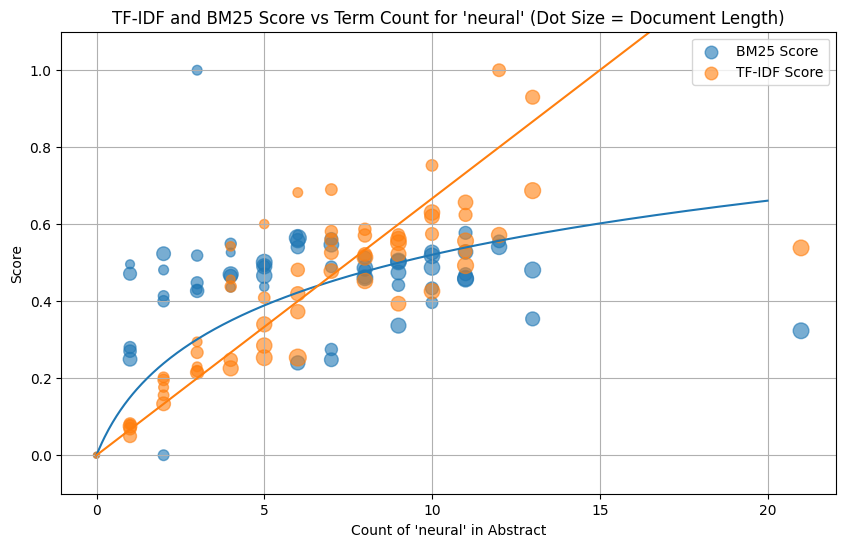

In [33]:
plt.figure(figsize=(10, 6))

sizes = [l / 2 for l in lengths]

# Compare BM25 and Log Curve
plt.scatter(bm25_counts, bm25_norm, s=sizes, alpha=0.6, label="BM25 Score")
x = np.linspace(0, 20, 500)
y1 = np.log10(x + 1) / 2
plt.plot(x, y1)

y2 = x/15
plt.plot(x, y2)
plt.scatter(tfidf_counts, tfidf_norm, s=sizes, alpha=0.6, label="TF-IDF Score")

plt.xlabel(f"Count of '{word}' in Abstract")
plt.ylabel("Score")
plt.title(f"TF-IDF and BM25 Score vs Term Count for '{word}' (Dot Size = Document Length)")
plt.grid(True)
plt.legend()
plt.ylim(-0.1, 1.1)

plt.show()

# BM25 Inverted Index

1. Prepare the Data
- Basic text prep (lowercase, punctuation, special characters)
- Stemming (group all words with similar stems)
- Remove common terms ('the', 'and', 'a', ...)

2. Build Inverted Table of Terms and DocumentId
- For each term in the documents find all documents with that term

3. For each query, find documents with those terms and compute bm25 score for documents. Combine the scores linearly to get a final ranking.

### 1. Data Preparation

Titles and Abstract Basic Text Preparation

In [34]:
titles = list(df['title']
              .str.lower() # lowercase
              .str.replace('-', ' ', regex=False)
              .str.replace(r'[^\w\s]', ' ') # replace punction with a space
              .str.replace(r'\s+', ' ', regex=True) # remove whitespace
              .str.strip()
              )

In [35]:
abstracts = list(df['abstract']
              .str.lower() # lowercase
              .str.replace('-', ' ', regex=False)
              .str.replace(r'[^\w\s]', ' ') # replace punction with a space
              .str.replace(r'\s+', ' ', regex=True) # remove whitespace
              .str.strip()
              )

Remove Common Terms

In [36]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
  removed = [t for t in text.split() if t not in stop_words]
  return ' '.join(removed)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yangg\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [37]:
titles = [remove_stop_words(title) for title in titles]
abstracts = [remove_stop_words(abstract) for abstract in abstracts]

Text Stemming

In [38]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

In [39]:
def stem_text(text):
  stemmed = [stemmer.stem(word) for word in text.split()]
  return ' '.join(stemmed)

titles = [stem_text(title) for title in titles]
print("ran titles")
abstracts = [stem_text(abstract) for abstract in abstracts]

ran titles


Save prepared titles and abstracts

In [40]:
with open('prepared_titles.txt', 'w') as f:
  f.write('\n'.join(titles))
with open('prepared_abstracts.txt', 'w') as f:
  f.write('\n'.join(abstracts))

### 2. Build Table of Terms

In [41]:
from collections import defaultdict, Counter

title_term_table = defaultdict(list)
abstract_term_table = defaultdict(list)

def add_title(text, doc_id):
  term_counts = Counter(text.split())
  for term, freq in term_counts.items():
    title_term_table[term].append((doc_id, freq))

def add_abstract(text, doc_id):
  term_counts = Counter(text.split())
  for term, freq in term_counts.items():
    abstract_term_table[term].append((doc_id, freq))

for i in range(len(titles)):
  add_title(titles[i], i)
  add_abstract(abstracts[i], i)

In [42]:
print(len(title_term_table))
print(len(abstract_term_table))

65372
395867


Save inverted tables to avoid recomputing

In [43]:
titles_file = 'titles_inverted_indices.pkl'
abstracts_file = 'abstracts_inverted_indices.pkl'

with open(titles_file, 'wb') as f:
  pickle.dump(title_term_table, f)

with open(abstracts_file, 'wb') as f:
  pickle.dump(abstract_term_table, f)

### 3. Score Based on Query

Prepare Query

In [44]:
def prep_query(query):
  query = query.lower()  # lowercase
  query = query.replace('-', ' ')  # no regex parameter needed
  query = re.sub(r'[^\w\s]', ' ', query)  # use re.sub for regex
  query = re.sub(r'\s+', ' ', query)  # use re.sub for regex
  query = query.strip()

  removed = [t for t in query.split() if t not in stop_words]
  query = ' '.join(removed)

  stemmed = [stemmer.stem(word) for word in query.split()]
  query = ' '.join(stemmed)

  return query

In [45]:
N = len(titles)
k = 1.2
b = 0.75
avg_doc_len_title = sum(len(t.split()) for t in titles) / len(titles)
avg_doc_len_abs = sum(len(a.split()) for a in abstracts) / len(abstracts)

title_weight = 0.5 # term appearing in title has more importance

def bm25(df, tf, dl, avg_dl):
  return np.log((N/df) + 1) * (tf * (k + 1)) / (tf + k * (1 - b + (dl / avg_dl)))

def bm25_rankings(query, num_res):
  doc_scores = defaultdict(int)
  for term in query.split():
    title_term = title_term_table[term]
    for doc_id, tf in title_term:
      doc_scores[doc_id] += title_weight * bm25(len(title_term), tf, len(titles[doc_id].split()), avg_doc_len_title)
    abstract_term = abstract_term_table[term]
    for doc_id, tf in abstract_term:
      doc_scores[doc_id] += bm25(len(abstract_term), tf, len(abstracts[doc_id].split()), avg_doc_len_abs)

  ranked_docs = sorted(doc_scores.items(), key=lambda s: s[1], reverse=True)

  if len(ranked_docs) < num_res:
    return ranked_docs

  return ranked_docs[:num_res]

In [46]:
def queried_df(paper_idx):
  return df.iloc[paper_idx]

### 4. Format Links

In [47]:
def clickable(df):
  search_res = []
  for _, row in df.iterrows():
    search_res.append(f'<a href="https://arxiv.org/pdf/{row['id']}.pdf">{row['title']}</a><br>{row['update_date']}')

  return search_res

### Full BM25 Search

In [48]:
def search_bm25(query):
  query = prep_query(query)
  bm25_res = bm25_rankings(query, 5)
  paper_idx = [s[0] for s in bm25_res]
  res_df = queried_df(paper_idx)
  search_res = clickable(res_df)
  return '<br>'.join(search_res)

In [49]:
query = "Neural Network"
search_results = search_bm25(query)
search_results = f"<h2>{query}</h2><br>" + search_results
display(HTML(search_results))

# RAG Based Search (Dense Vectore Embeddings)
1. Load an embedding model like all-MiniLM-L6-v2
2. For each document feed title + abstract into embedding model and get a vector for that document
3. For the query, use model to generate vector embedding
4. Compare similarity scores between documents and queries based on vector distance

Visualizations:
- 2D Embedding Projects
- Query-Document Heatmap for different queries
- Synonym Matching

### 1. Download Embedding Model

In [50]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

c:\Users\yangg\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\yangg\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### 2. Generate Vector Embeddings for Documents

Create Vector Embeddings Download with Google Colab GPU

In [51]:
with open('prepared_titles.txt', 'r') as f:
  titles = f.read().split('\n')

with open('prepared_abstracts.txt', 'r') as f:
  abstracts = f.read().split('\n')

In [52]:
import torch

if torch.cuda.is_available():
  print(f"GPU available: {torch.cuda.get_device_name(0)}")
else:
  print("Using CPU")

Using CPU


In [53]:
from sentence_transformers import SentenceTransformer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('all-MiniLM-L6-v2', device=device)

In [54]:
embedding_file = 'document_embedding.npy'

In [55]:
if os.path.exists(embedding_file):
  document_embeddings = np.load(embedding_file)
else:
  documents = []
  for i in range(len(titles)):
    combined = f"{titles[i]} {abstracts[i]}"
    documents.append(combined)

  print("Generating document embeddings...")
  document_embeddings = model.encode(documents, show_progress_bar=True)
  print(f"Generated embeddings shape: {document_embeddings.shape}")

  np.save(embedding_file, document_embeddings)

Generating document embeddings...


Batches:   0%|          | 0/4772 [00:00<?, ?it/s]

Generated embeddings shape: (152693, 384)


### 3. Vector Embedding Similarity

In [56]:
def vector_rankings(query, num_res):
  query_embedding = model.encode([query])

  similarities = cosine_similarity(query_embedding, document_embeddings)[0]

  indices = np.argsort(similarities)[::-1][:num_res]

  results = [(i, similarities[i]) for i in indices]

  return results

### Vector Embedding Search

In [57]:
def search_vector_embedding(query):
  query = prep_query(query)
  vector_res = vector_rankings(query, 5)
  paper_idx = [s[0] for s in vector_res]
  res_df = queried_df(paper_idx)
  search_res = clickable(res_df)
  return '<br>'.join(search_res)

In [58]:
query = "Neural Network"
search_results = search_vector_embedding(query)
search_results = f"<h2>{query}</h2><br>" + search_results
display(HTML(search_results))

# Combination of Vector Embedding and BM25

### Imports

In [59]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import re
import os
import pickle
from collections import defaultdict, Counter
from IPython.display import display, HTML

### Load cs.AI subset of papers

In [60]:
subset = "arxiv_csAI_subset.json"
file = subset

def get_data():
  with open(file) as f:
    for line in f:
      yield line

In [61]:
data = get_data()

cols = ['id', 'authors', 'title', 'update_date', 'categories', 'abstract', 'doi']

interested_data = []
for line in data:
  paper = json.loads(line)
  interested_data.append({col: paper.get(col) for col in cols})

df = pd.DataFrame(interested_data)

df = df.drop('doi', axis=1)
df = df.dropna()

df.head(5)

,id,authors,title,update_date,categories,abstract
0,0704.0047,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,2009-09-29,cs.NE cs.AI,The intelligent acoustic emission locator is...
1,0704.0050,T. Kosel and I. Grabec,Intelligent location of simultaneously active ...,2007-05-23,cs.NE cs.AI,Part I describes an intelligent acoustic emi...
2,0704.0304,Carlos Gershenson,The World as Evolving Information,2013-04-05,cs.IT cs.AI math.IT q-bio.PE,This paper discusses the benefits of describ...
3,0704.0985,"Mohd Abubakr, R.M.Vinay",Architecture for Pseudo Acausal Evolvable Embe...,2007-05-23,cs.NE cs.AI,Advances in semiconductor technology are con...
4,0704.1028,Jianlin Cheng,A neural network approach to ordinal regression,2007-05-23,cs.LG cs.AI cs.NE,Ordinal regression is an important type of l...


### Load Inverted BM25 Tables

In [62]:
titles_file = 'titles_inverted_indices.pkl'
abstracts_file = 'abstracts_inverted_indices.pkl'

with open(titles_file, 'rb') as f:
  title_term_table = pickle.load(f)

with open(abstracts_file, 'rb') as f:
  abstract_term_table = pickle.load(f)

In [63]:
with open('prepared_titles.txt', 'r') as f:
  titles = f.read().split('\n')

with open('prepared_abstracts.txt', 'r') as f:
  abstracts = f.read().split('\n')

### Load BM25 Functions

Data Preparation

In [64]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yangg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer('english')

In [66]:
def prep_query(query):
  query = query.lower()  # lowercase
  query = query.replace('-', ' ')  # no regex parameter needed
  query = re.sub(r'[^\w\s]', ' ', query)  # use re.sub for regex
  query = re.sub(r'\s+', ' ', query)  # use re.sub for regex
  query = query.strip()

  removed = [t for t in query.split() if t not in stop_words]
  query = ' '.join(removed)

  stemmed = [stemmer.stem(word) for word in query.split()]
  query = ' '.join(stemmed)

  return query

BM25 Algorithms

In [67]:
N = len(titles)
k = 1.2
b = 0.75
avg_doc_len_title = sum(len(t.split()) for t in titles) / len(titles)
avg_doc_len_abs = sum(len(a.split()) for a in abstracts) / len(abstracts)

title_weight = 0.5 # term appearing in title has more importance

def bm25(df, tf, dl, avg_dl):
  return np.log((N/df) + 1) * (tf * (k + 1)) / (tf + k * (1 - b + (dl / avg_dl)))

def bm25_rankings(query, num_res):
  doc_scores = defaultdict(int)
  for term in query.split():
    title_term = title_term_table[term]
    for doc_id, tf in title_term:
      doc_scores[doc_id] += title_weight * bm25(len(title_term), tf, len(titles[doc_id].split()), avg_doc_len_title)
    abstract_term = abstract_term_table[term]
    for doc_id, tf in abstract_term:
      doc_scores[doc_id] += bm25(len(abstract_term), tf, len(abstracts[doc_id].split()), avg_doc_len_abs)

  ranked_docs = sorted(doc_scores.items(), key=lambda s: s[1], reverse=True)

  if len(ranked_docs) < num_res:
    return ranked_docs

  return ranked_docs[:num_res]

Misc

In [68]:
def queried_df(paper_idx):
  return df.iloc[paper_idx]

In [69]:
def clickable(df):
  search_res = []
  for _, row in df.iterrows():
    search_res.append(f'<a href="https://arxiv.org/pdf/{row['id']}.pdf">{row['title']}</a><br>{row['update_date']}')

  return search_res

### Load Vector Embeddings

In [70]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer('all-MiniLM-L6-v2')

In [71]:
embedding_file = 'document_embedding.npy'
document_embeddings = np.load(embedding_file)

### Compute Combined Vector Embedding and BM25 Search Results

In [72]:
def combined_ranking(query, num_res, bm25_weight = 0.3, vector_weight=0.7):
  query = prep_query(query)

  bm25_res = bm25_rankings(query, num_res * 5)

  bm25_scores = {doc_id: score for doc_id, score in bm25_res}

  # normalize bm25 to 0-1
  if bm25_scores:
    max_bm25 = max(bm25_scores.values())
    bm25_scores = {k: v/max_bm25 for k, v in bm25_scores.items()}

  query_embedding = model.encode([query])
  similarities = cosine_similarity(query_embedding, document_embeddings)[0]

  combined_scores = {}
  for doc_id in range(len(titles)):
    bm25_score = bm25_scores.get(doc_id, 0) * bm25_weight
    vector_score = similarities[doc_id] * vector_weight
    combined_scores[doc_id] = bm25_score + vector_score

  top_res = sorted(combined_scores.items(), key=lambda s: s[1], reverse=True)[:num_res]

  return top_res

In [73]:
def combined_search(query):
  combined_res = combined_ranking(query, 5)
  paper_idx = [s[0] for s in combined_res]
  res_df = queried_df(paper_idx)
  search_res = clickable(res_df)
  return '<br>'.join(search_res)

## Final Level 2 Search Engine

In [74]:
query = "Neural Network"
search_results = combined_search(query)
search_results = f"<h2>{query}</h2><br>" + search_results
display(HTML(search_results))

In [115]:
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel

def normalize_text(x):
  if x is None:
      return ""

  if isinstance(x, str):
      return x

  if hasattr(x, "page_content"):
      return x.page_content

  if isinstance(x, dict):
      for key in ["abstract", "text", "content", "body"]:
          if key in x and isinstance(x[key], str):
              return x[key]
      return " ".join(str(v) for v in x.values())

  if isinstance(x, (list, tuple, set)):
      return " ".join(str(e) for e in x)

  return str(x)

def cross_encoder_score(query, doc, tokenizer, model):
  """
  Return a embedding similarilty score between a query and a document.
  """
  query = normalize_text(query)
  doc = normalize_text(doc)
  encoded = tokenizer(
        query,
        doc,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=256
    )

  with torch.no_grad():
    outputs = model(**encoded)
  cls_emb = outputs.last_hidden_state[:, 0, :] # feature of the sentence
  cls_emb = F.normalize(cls_emb, dim=1)
  return cls_emb.squeeze(0)  # cross-encoding use CLS as score

def rerank_with_cross_encoder(query, candidates, tokenizer, model):
  """
  Rerank the candidate documents with a cross-encoder.
  """
  scored = []
  
  for idx,title,abs in zip(candidates.index, candidates['title'], candidates['abstract']):
    score = cross_encoder_score(query, title+abs, tokenizer, model)
    scored.append((score, idx))
  ranked = sorted(scored, key=lambda x: torch.dot(x[0], x[0]), reverse=True)

  return [doc for _,doc in ranked]

def retrieve_and_rerank(query, candidates,  tokenizer_model =  "bert-base-uncased", cross_encoder_model = "bert-base-uncased", final_k=10):
  """
  Rerank using cross-encoder and return final_k best docs.
  """
  tokenizer = AutoTokenizer.from_pretrained(tokenizer_model)
  cross_encoder = AutoModel.from_pretrained(cross_encoder_model)  
  ranked_docs = rerank_with_cross_encoder(
        query,
        candidates,
        tokenizer,
        cross_encoder
    )

  return ranked_docs[:final_k]

In [116]:
query = "Neural Network"
candidates = queried_df(s[0] for s in combined_ranking(query, 100)) # obtain top 100 results from BM25
tokenizer_model = AutoTokenizer.from_pretrained("bert-base-uncased")
cross_encoder_model = AutoModel.from_pretrained("bert-base-uncased")
net_ranked = rerank_with_cross_encoder(query, candidates, tokenizer_model, cross_encoder_model) # run the neural network reranker

In [119]:
nnet_ranked_df = queried_df(net_ranked)
disp_results = f'<h2>{query}</h2><br>'
disp_results += '<br>'.join(clickable(nnet_ranked_df.head()))
display(HTML(disp_results))

## Visualization

### For BM25

In [75]:
query_embedding = model.encode([query])

similarities = cosine_similarity(query_embedding, document_embeddings)[0]

worst_indices = np.argsort(similarities)[:3]
best_indices = np.argsort(similarities)[::-1][:3]

In [76]:
embeddings = np.concatenate([query_embedding, document_embeddings[best_indices], document_embeddings[worst_indices]], axis=0)

In [77]:
print(embeddings.shape)

(7, 384)


In [79]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

pca = PCA(n_components=2)
reduced_pca = pca.fit_transform(embeddings)

tsne = TSNE(n_components=2, perplexity=5, max_iter=300)
reduced_tsne = tsne.fit_transform(embeddings)

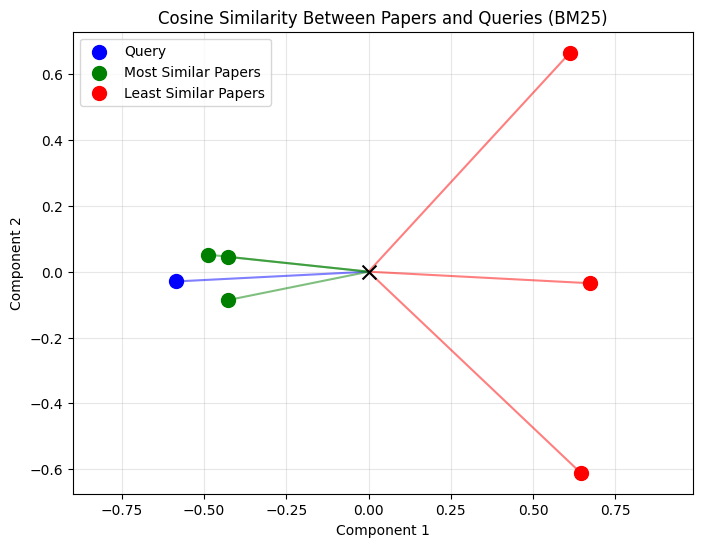

In [122]:
plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red']
labels = ['Query', 'Most Similar Papers', 'Least Similar Papers']
groups = [slice(0, 1), slice(1, 4), slice(4, None)]

for color, label, group in zip(colors, labels, groups):
  points = reduced_pca[group]

  for point in points:
    plt.plot([0, point[0]], [0, point[1]],
              color=color, alpha=0.5, linewidth=1.5)

  plt.scatter(points[:, 0], points[:, 1],
              color=color, label=label, s=100, zorder=5)

plt.scatter(0, 0, color='black', s=100, marker='x', zorder=10)

plt.title('Cosine Similarity Between Papers and Queries (BM25)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

### For Neural Network Reranking

In [121]:
nnet_ranked_embeddings = []
for idx, item in nnet_ranked_df.iterrows():
    nnet_ranked_embeddings.append(item['title'] + item['abstract'])

nnet_ranked_embeddings = model.encode(nnet_ranked_embeddings)

In [123]:
query_embedding = model.encode([query])
similarities = cosine_similarity(query_embedding, nnet_ranked_embeddings)[0]

worst_indices = np.argsort(similarities)[:3]
best_indices = np.argsort(similarities)[::-1][:3]
embeddings = np.concatenate([query_embedding, document_embeddings[best_indices], document_embeddings[worst_indices]], axis=0)

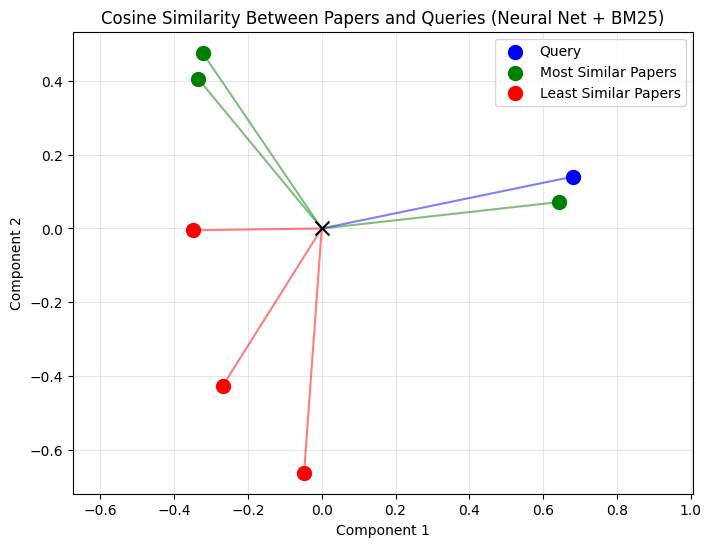

In [124]:
pca = PCA(n_components=2)
reduced_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))

colors = ['blue', 'green', 'red']
labels = ['Query', 'Most Similar Papers', 'Least Similar Papers']
groups = [slice(0, 1), slice(1, 4), slice(4, None)]

for color, label, group in zip(colors, labels, groups):
  points = reduced_pca[group]

  for point in points:
    plt.plot([0, point[0]], [0, point[1]],
              color=color, alpha=0.5, linewidth=1.5)

  plt.scatter(points[:, 0], points[:, 1],
              color=color, label=label, s=100, zorder=5)

plt.scatter(0, 0, color='black', s=100, marker='x', zorder=10)

plt.title('Cosine Similarity Between Papers and Queries (Neural Net + BM25)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

# Bibliography

**Resources**  
TF-IDF: https://www.geeksforgeeks.org/machine-learning/understanding-tf-idf-term-frequency-inverse-document-frequency/  
BM25: https://medium.com/@kushagramisra10/unlocking-the-power-of-bm25-why-its-outshining-tf-idf-in-the-world-of-search-152413392790  
Vector Embedding Search: https://www.oracle.com/database/vector-search/  

**Packages**  
TF-IDF Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html  
Rank-BM25 API: https://pypi.org/project/rank-bm25/  
Sentence Embedding Documentation: https://sbert.net/  
Vector Similarity Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html  

